In [1]:
# import pandas ,  numpy
import pandas as pd
import numpy as np

# import superstore.csv
df = pd.read_csv('/content/superstore (1).csv')

print(df.head)


<bound method NDFrame.head of        Unnamed: 0                  Order ID  Order Date   Ship Date  \
0               0  CA-2014-AB10015140-41954  11-11-2014  13-11-2014   
1               1    IN-2014-JR162107-41675  05-02-2014  07-02-2014   
2               2    IN-2014-CR127307-41929  17-10-2014  18-10-2014   
3               3   ES-2014-KM1637548-41667  28-01-2014  30-01-2014   
4               4   SG-2014-RH9495111-41948  05-11-2014  06-11-2014   
...           ...                       ...         ...         ...   
51285       51285   IN-2015-KE1642066-42174  19-06-2015  19-06-2015   
51286       51286  US-2014-ZD21925140-41765  06-05-2014  10-05-2014   
51287       51287  CA-2012-ZD21925140-41147  26-08-2012  31-08-2012   
51288       51288   MX-2013-RB1979518-41322  17-02-2013  21-02-2013   
51289       51289   MX-2013-MC1810093-41416  22-05-2013  26-05-2013   

            Ship Mode   Customer ID       Customer Name      Segment  \
0         First Class  AB-100151402       Aar

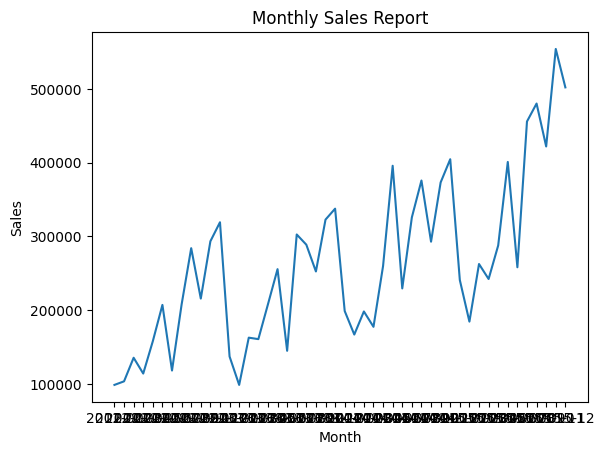

In [9]:
# get monthly and yearly sales report  with order date in the format of %m-%d-%Y
df['Order Date'] = pd.to_datetime(df['Order Date'],  format='%d-%m-%Y')
# get sales
df['Sales'] = df['Sales'].astype(float)
# get the sum of sale at that point
monthly_sales = df.groupby(df['Order Date'].dt.strftime('%Y-%m'))['Sales'].sum()
#plot monthly sale
import matplotlib.pyplot as plt
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Report')
plt.show()


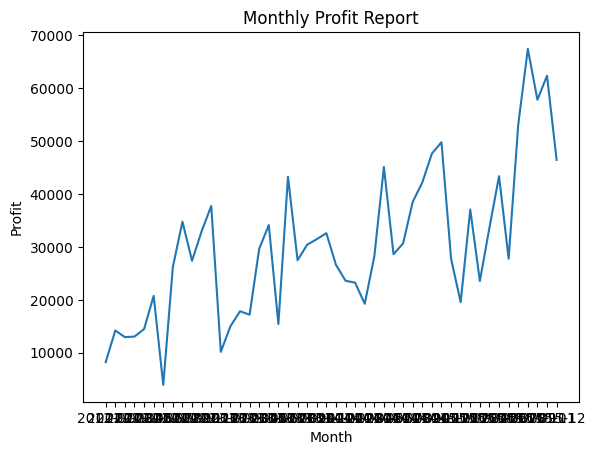

In [10]:
# plot line graph for profit
df['Profit'] = df['Profit'].astype(float)
monthly_profit = df.groupby(df['Order Date'].dt.strftime('%Y-%m'))['Profit'].sum()
plt.plot(monthly_profit.index, monthly_profit.values)
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Profit Report')
plt.show()

In [13]:
# get profit margin with respect to df['product']
df['Profit Margin'] = df['Profit'] / df['Quantity']
product_profit_margin = df.groupby('Sub-Category')['Profit Margin'].mean()
print(product_profit_margin)

Sub-Category
Accessories    11.462919
Appliances     23.171265
Art             3.139934
Binders         3.674316
Bookcases      19.340549
Chairs         11.644770
Copiers        31.936047
Envelopes       3.382224
Fasteners       1.458358
Furnishings     4.218511
Labels          1.419271
Machines       10.899975
Paper           4.279233
Phones         17.483510
Storage         6.217935
Supplies        2.619970
Tables        -18.961020
Name: Profit Margin, dtype: float64


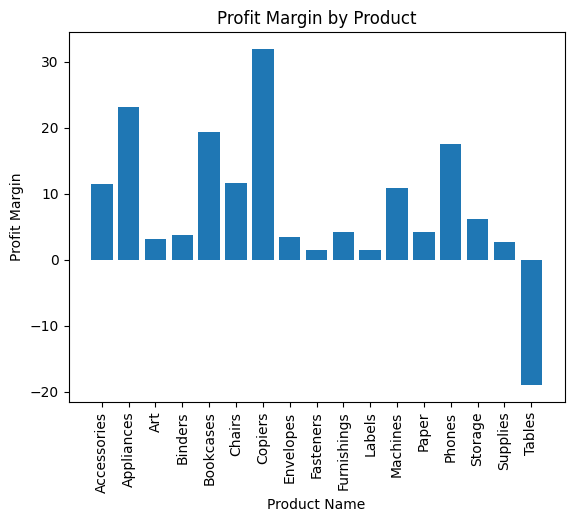

In [14]:
#plot bar grapg
plt.bar(product_profit_margin.index, product_profit_margin.values)
plt.xlabel('Product Name')
plt.ylabel('Profit Margin')
plt.title('Profit Margin by Product')
plt.xticks(rotation=90)
plt.show()

Best Products:
Sub-Category
Phones       1704935.0
Copiers      1508281.0
Chairs       1499905.0
Bookcases    1465367.0
Storage      1124197.0
Name: Sales, dtype: float64
Worst Products:
Sub-Category
Labels        72085.0
Fasteners     88183.0
Envelopes    168013.0
Paper        239896.0
Supplies     241649.0
Name: Sales, dtype: float64


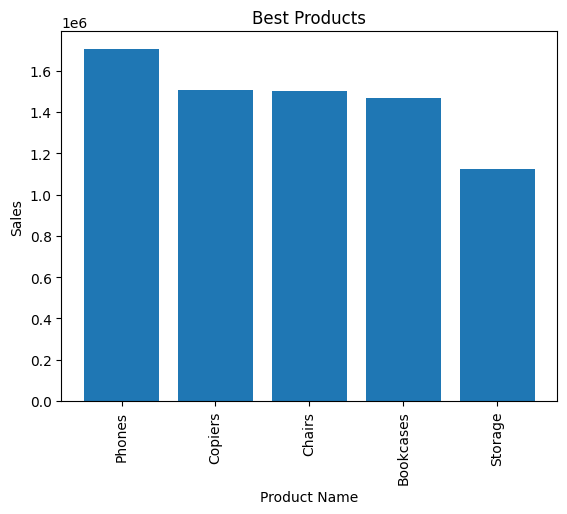

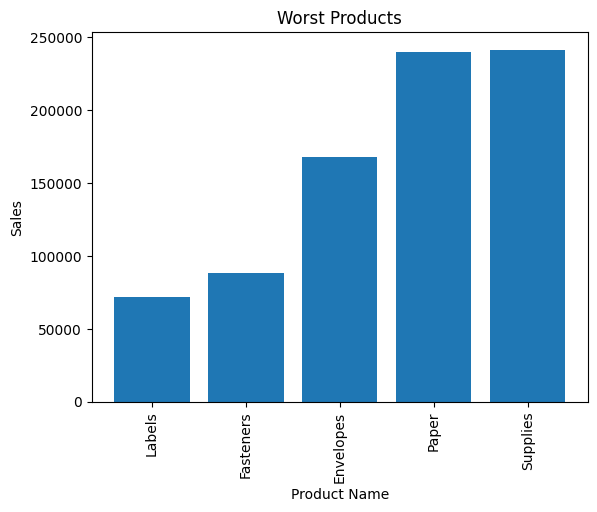

In [18]:
# get best and worst products acording to sales
product_sales = df.groupby('Sub-Category')['Sales'].sum()
best_products = product_sales.nlargest(5)
worst_products = product_sales.nsmallest(5)
print('Best Products:')
print(best_products)
print('Worst Products:')
print(worst_products)
#plot bar graph best products
plt.bar(best_products.index, best_products.values)
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.title('Best Products')
plt.xticks(rotation=90)
plt.show()
#plot bar graph best products
plt.bar(worst_products.index, worst_products.values)
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.title('Worst Products')
plt.xticks(rotation=90)
plt.show()

In [19]:
# sales and profit distribution according to market
market_sales = df.groupby('Market')['Sales'].sum()
market_profit = df.groupby('Market')['Profit'].sum()
print('Sales Distribution by Market:')
print(market_sales)
print('Profit Distribution by Market:')
print(market_profit)


Sales Distribution by Market:
Market
Africa           781499.0
Asia Pacific    4035462.0
Europe          3281445.0
LATAM           2159583.0
USCA            2358033.0
Name: Sales, dtype: float64
Profit Distribution by Market:
Market
Africa           87683.0
Asia Pacific    400876.0
Europe          445907.0
LATAM           219350.0
USCA            300820.0
Name: Profit, dtype: float64


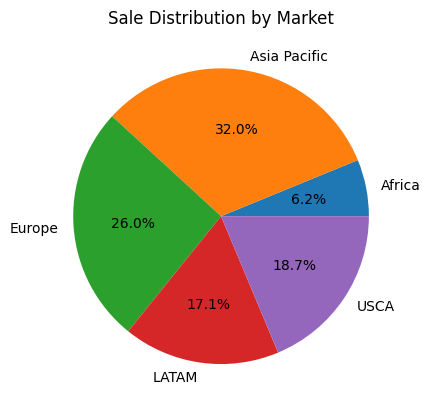

In [20]:
# plot sale and profit distribution
plt.pie(market_sales.values, labels=market_sales.index, autopct='%1.1f%%')
plt.title('Sale Distribution by Market')
plt.show()



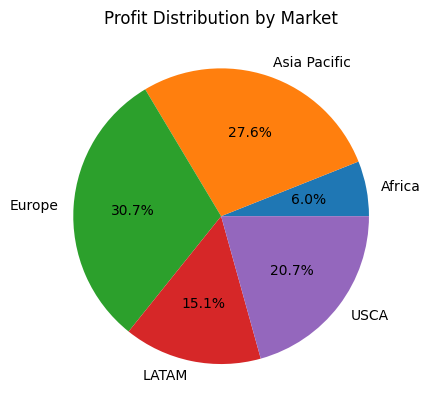

In [21]:
plt.pie(market_profit.values, labels=market_profit.index, autopct='%1.1f%%')
plt.title('Profit Distribution by Market')
plt.show()

In [23]:
# analise shipping cost with respect to catogorirs and priority
shipping_cost = df.groupby(['Category', 'Order Priority'])['Shipping Cost'].mean()
print(shipping_cost)


Category         Order Priority
Furniture        Critical          104.864078
                 High               54.900821
                 Low                47.392034
                 Medium             30.845765
Office Supplies  Critical           28.896199
                 High               15.658292
                 Low                12.867518
                 Medium              8.764120
Technology       Critical          113.456806
                 High               62.487758
                 Low                49.678261
                 Medium             34.179769
Name: Shipping Cost, dtype: float64


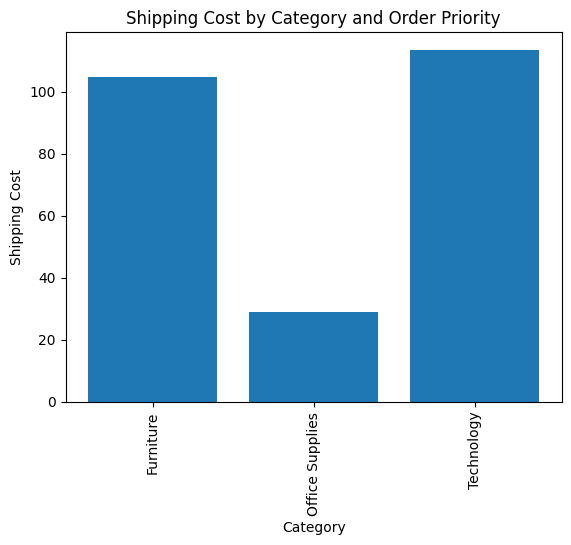

([0, 1, 2, 3],
 [Text(0, 0, 'Critical'),
  Text(1, 0, 'High'),
  Text(2, 0, 'Low'),
  Text(3, 0, 'Medium')])

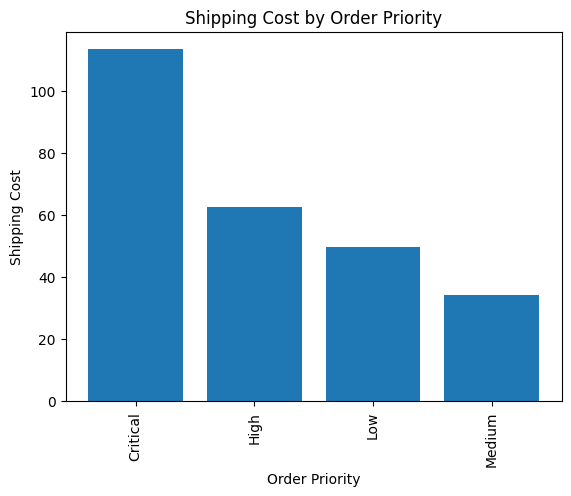

In [31]:
# plot the data shipping cost acoding to category and order priority as a 2d column
plt.subplot
plt.bar(shipping_cost.index.get_level_values(0), shipping_cost.values)
plt.xlabel('Category')
plt.ylabel('Shipping Cost')
plt.title('Shipping Cost by Category and Order Priority')
plt.xticks(rotation=90)
plt.show()
# plot for ptiority
plt.subplot
plt.bar(shipping_cost.index.get_level_values(1), shipping_cost.values)
plt.xlabel('Order Priority')
plt.ylabel('Shipping Cost')
plt.title('Shipping Cost by Order Priority')
plt.xticks(rotation=90)
